# Comparação entre diferentes ODs
Análise de comparação da representatividade dos diferentes meios de transporte entre versões da pesquisa Origem Destino

Dataset: [Pesquisa Origem e Destino](https://transparencia.metrosp.com.br/dataset/pesquisa-origem-e-destino)

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from dbfread import DBF
from simpledbf import Dbf5

In [4]:
# Datasets path
od77_path = '../data/OD/OD-1977/Banco de Dados/od77_CD.dbf'
od87_path = '../data/OD/OD-1987/Banco de Dados/OD_1987.dbf'
od97_path = '../data/OD/OD-1997/Banco de Dados/Domiciliar/OD97Zona.dbf'
od07_path = '../data/OD/OD-2007/Banco de Dados-OD2007/OD_2007_v2d.dbf'
od17_path = '../data/OD/OD-2017/Banco de Dados-OD2017/od_2017.csv'


## OD-17

In [73]:
df_17 = pd.read_csv(od17_path)

In [74]:
df_17 = df_17[['MODOPRIN', 'FE_VIA']]
df_17 = df_17.dropna(subset='MODOPRIN')

In [75]:
sum_fe_via = df_17['FE_VIA'].sum()

In [76]:
df_17 = df_17.query('MODOPRIN == 16') # filtra viagens a pé
walk_17 = (df_17['FE_VIA'].sum() / sum_fe_via * 100).round(2) # calcula a rep de viagens a pé
walk_17

31.78

---

## OD-2007

In [ ]:
# Leitura do seu arquivo DBF
dbf = Dbf5(od07_path)
# Converte para um DataFrame do pandas
df_07 = dbf.to_dataframe()

In [ ]:
df_07 = df_07[['MODOPRIN', 'FE_VIA']]

In [45]:
sum_fe_via = df_07['FE_VIA'].sum()

In [54]:
df_07 = df_07.query('MODOPRIN == 16') # filtra viagens a pé
walk_07 = (df_07['FE_VIA'].sum() / sum_fe_via * 100).round(2) # calcula a rep de viagens a pé
walk_07

33.14

---

## OD-97

In [57]:
# Leitura do seu arquivo DBF
dbf = Dbf5(od97_path)
# Converte para um DataFrame do pandas
df_97 = dbf.to_dataframe()

In [59]:
df_97 = df_97[['MODOPRIN', 'FE_VIA']]

In [60]:
sum_fe_via = df_97['FE_VIA'].sum()

In [61]:
df_97 = df_97.query('MODOPRIN == 12') # filtra viagens a pé
walk_97 = (df_97['FE_VIA'].sum() / sum_fe_via * 100).round(2) # calcula a rep de viagens a pé
walk_97

34.4

---

## OD-87

In [62]:
# Leitura do seu arquivo DBF
dbf = Dbf5(od87_path)
# Converte para um DataFrame do pandas
df_87 = dbf.to_dataframe()

In [63]:
df_87 = df_87[['MODOPRIN', 'FE_VIA']]

In [64]:
sum_fe_via = df_87['FE_VIA'].sum()

In [65]:
df_87 = df_87.query('MODOPRIN == 13') # filtra viagens a pé
walk_87 = (df_87['FE_VIA'].sum() / sum_fe_via * 100).round(2) # calcula a rep de viagens a pé
walk_87

36.23

---

## OD-77

In [66]:
# Leitura do seu arquivo DBF
dbf = Dbf5(od77_path)
# Converte para um DataFrame do pandas
df_77 = dbf.to_dataframe()

In [77]:
df_77 = df_77[['MODOPRIN', 'FE_VIA']]

In [78]:
sum_fe_via = df_77['FE_VIA'].sum()

In [79]:
df_77 = df_77.query('MODOPRIN == 11') # filtra viagens a pé
walk_77 = (df_77['FE_VIA'].sum() / sum_fe_via * 100).round(2) # calcula a rep de viagens a pé
walk_77

28.03

---

## Percentuais de viagens a pé de todas as ODs

In [82]:
years = ['1977', '1987', '1997', '2007', '2017']
walk_p = [walk_77, walk_87, walk_97, walk_07, walk_17]
df_walk = pd.DataFrame({
    'Ano': years,
    'Rep': walk_p
})
df_walk

,Ano,Rep
0,1977,28.03
1,1987,36.23
2,1997,34.40
3,2007,33.14
4,2017,31.78


Gráfico: Percentual de viagens a pé x Anos

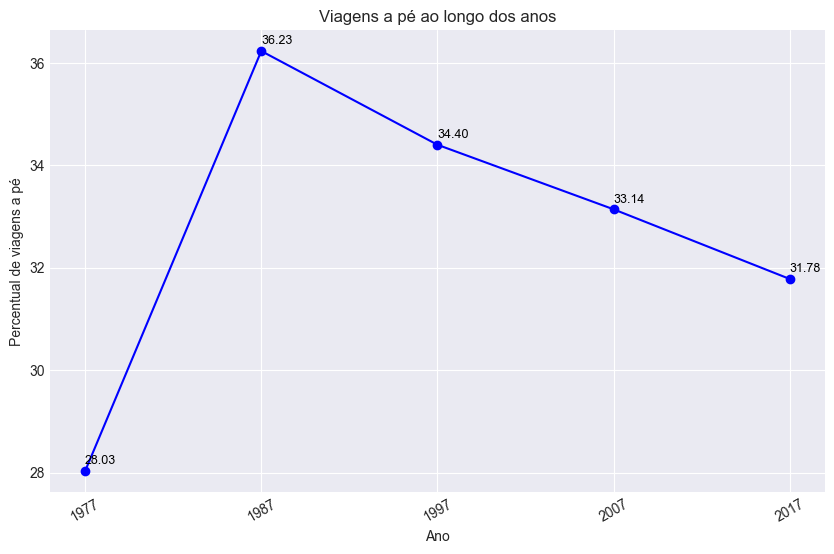

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(df_walk['Ano'], df_walk['Rep'], marker='o', linestyle='-', color='b')

# Adicionar os valores nos pontos
for i, value in enumerate(df_walk['Rep']):
    plt.annotate(f'{value:.2f}', (df_walk['Ano'][i], df_walk['Rep'][i]), 
                 textcoords="offset points", xytext=(0, 5), ha='left', fontsize=9, color='black')

plt.title('Viagens a pé ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Percentual de viagens a pé')
plt.xticks(rotation=30)

# Exibindo o gráfico
plt.show()